## 1. Quantum oscillator in 1D: variational approach
Consider the hamiltonian of the quantum harmonic oscillator H = p2=2 + x2=2 (having
choosen m = k = h = 1). We want to solve it numerically with VMC. To this purpose
consider two dierent choices for the trial wavefunction:
psi1(x)=B(a^2-x^2),  psi2(x)=Ae^(-bx^2)

In [1]:
def p1(x,a):
    if abs(x)<a:
        y=a**2-x**2
    else:
        y=0    
    return y**2

def p2(x,b):
    return np.exp(-x**2*b*2)

(a) Calculate < E >

In [2]:
import numpy as np

def metropolis(p,x0,d,n, *args):
    x=[]
    xi=x0
    for i in range(n):
        x.append(xi)
        di=np.random.uniform(-d,d)
        xt=xi+di
        w=p(xt, *args)/p(xi,*args)
        if w >= 1:
            xi=xt
        else:
            r=np.random.uniform(0,1)
            if w >= r:
                xi=xt   
    return np.array(x)

In [3]:
#Energy of first wavefunction
def E1(x,a):
    Epot=sum(x**2/2)/n
    Ekin=sum(1/(a**2-x**2))/n
    E=Epot+Ekin
    return E

#Energy of second wavefunction
def E2(x,b):
    S=sum(np.array(x)**2)/n
    E=b+(0.5-2*b**2)*S
    return E

In [ ]:
x0=0
d=2
n=100000
E=[]
alst=np.linspace(1.5,2.5,100)
for a in alst:
    x=metropolis(p1,x0,d,n,a)
    E.append(E1(x,a))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Energy

plt.plot(alst,E)
plt.title(r'$\psi_1(x)=A(a^2-x^2)$')
plt.xlabel('a')
plt.ylabel('E')
plt.show()

In [ ]:
x0=0
d=5
n=10000
E=[]
blst=np.linspace(0.2,0.8,60)
for b in blst:
    x=metropolis(p2,x0,d,n,b)
    E.append(E2(x,b))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Energy

plt.plot(blst,E)
plt.title(r'$\psi_2(x)=Be^{-bx^2}$')
plt.xlabel('b')
plt.ylabel('E')
plt.show()

(c) Instead of solving the problem by minimizing < EL >, solve it minimizing the variance:

In [4]:
#Variance of first wavefunction
def V1(x,a):
    ES  = sum(1/(a**2-x**2)**(2)+ x**2/(a**2-x**2) + 0.25*x**4)/n
    V   =  ES - E1(x,a)**2
    return V

#Variance of second wavefunction
def V2(x,b):
    S=sum(np.array(x)**2)/n
    S2=sum(np.array(x)**4)/n
    V= b**2 + (b-4*b**3)*S + (0.5-2*b**2)**2*S2 - E2(x,b)**2
    return V

In [5]:
x0=0
d=2
n=100000
V=[]
alst=np.linspace(1.3,2.1,80)
for a in alst:
    x=metropolis(p1,x0,d,n,a)
    V.append(V1(x,a))

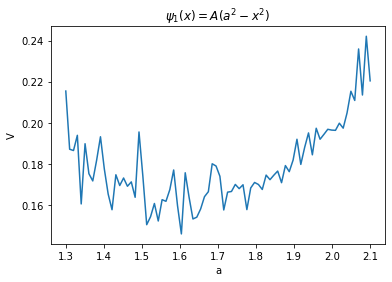

In [6]:
import matplotlib.pyplot as plt
import numpy as np

#Variance

plt.plot(alst,V)
plt.title(r'$\psi_1(x)=A(a^2-x^2)$')
plt.xlabel('a')
plt.ylabel('V')
plt.show()

In [ ]:
x0=0
d=5
n=10000
V=[]
blst=np.linspace(0.2,0.8,60)
for b in blst:
    x=metropolis(p2,x0,d,n,b)
    V.append(V2(x,b))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Energy

plt.plot(blst,V)
plt.title(r'$\psi_2(x)=Be^{-bx^2}$')
plt.xlabel('b')
plt.ylabel('V')
plt.show()

## 2. Anharmonic quantum oscillator 1D

In [7]:
def V(x):
    b=0.125
    return 0.5*x**2+b*x**4

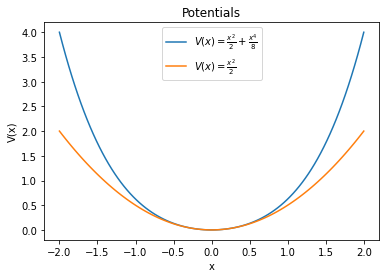

In [11]:
import matplotlib.pyplot as plt
import numpy as np

#Variance
x=np.linspace(-2,2,100)
plt.plot(x,V(x),label=r'$V(x)=\frac{x^2}{2}+\frac{x^4}{8}$')
plt.plot(x,0.5*x**2,label=r'$V(x)=\frac{x^2}{2}$')

plt.title('Potentials')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.legend()
plt.show()

In [12]:
#Energy of the perturbation
def DE(x,b):
    DE=sum(0.125*np.array(x)**4)/n
    return DE

In [18]:
x0=0
d=5
n=100000
E=[]
blst=np.linspace(0.4,0.7,60)
for b in blst:
    x=metropolis(p2,x0,d,n,b)
    E.append(E2(x,b)+DE(x,b))

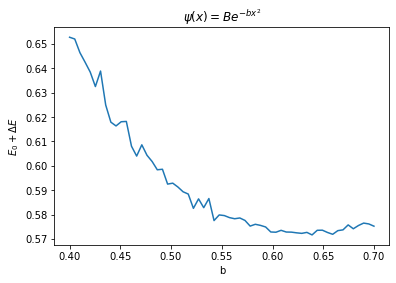

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#Energy

plt.plot(blst,E)
plt.title(r'$\psi(x)=Be^{-bx^2}$')
plt.xlabel('b')
plt.ylabel(r'$E_0+\Delta E$')
plt.show()